In [2]:
from sympy import *
init_printing()

Define time variable

In [3]:
t = Symbol('t')

Define parameter symbols

In [4]:
# limb lengths
l_1, l_2, l_3, l_4 = symbols('l_1, l_2, l_3, l_4')

# limb masses
m_1, m_2, m_3 = symbols('m_1, m_2, m_3')

# joint stiffnesses
k_B, k_C = symbols('k_B, k_C')

# joint damping
b_B, b_C = symbols('b_B, b_C')

# joint neutral angles
psi_B, psi_C = symbols('psi_B, psi_C')

# foot angle
phi_D = symbols('phi_E')

# Walking speed
v = symbols('v')

# Swing phase hip height
y_A_SW = Function('y_ASW')(t)

Define coordinate symbols

In [5]:
# limb orientations
theta_1 = Function('theta_1')(t)
theta_2 = Function('theta_2')(t)
theta_3 = Function('theta_3')(t)

# hip height
y = Function('y')(t)

Calculate positions

In [6]:
# rates of change
omega_1 = diff(theta_1)
omega_2 = diff(theta_2)
omega_3 = diff(theta_3)

# heel angle
theta_4 = theta_3 - phi_D
omega_4 = diff(theta_4, t)

# joint positions
x_A = 0
y_A = y
x_B = x_A + l_1 * sin(theta_1)
y_B = y_A - l_1 * cos(theta_1)
x_C = x_B + l_2 * sin(theta_2)
y_C = y_B - l_2 * cos(theta_2)
x_D = x_C + l_3 * sin(theta_3)
y_D = y_C - l_3 * cos(theta_3)
x_E = x_C + l_4 * sin(theta_4)
y_E = y_C - l_4 * cos(theta_4)

# joint velocities
u_A = diff(x_A, t)
v_A = diff(y_A, t)
u_B = diff(x_B, t)
v_B = diff(y_B, t)
u_C = diff(x_C, t)
v_C = diff(y_C, t)
u_D = diff(x_D, t)
v_D = diff(y_D, t)
u_E = diff(x_E, t)
v_E = diff(y_E, t)

# Centers of masses
x_1 = x_A + l_1 * sin(theta_1) / 2
y_1 = y_A - l_1 * cos(theta_1) / 2
x_2 = x_B + l_2 * sin(theta_2) / 2
y_2 = y_B - l_2 * cos(theta_2) / 2
x_3 = x_C + l_3 * sin(theta_3) / 2
y_3 = y_C - l_3 * cos(theta_3) / 2

# COM velocities
u_1 = diff(x_1, t)
v_1 = diff(y_1, t)
u_2 = diff(x_2, t)
v_2 = diff(y_2, t)
u_3 = diff(x_3, t)
v_3 = diff(y_3, t)

In [7]:
y_B 

In [8]:
# Moments of inertia
I_1 = m_1 * l_1**2 / 12
I_2 = m_2 * l_2**2 / 12
I_3 = m_3 * l_3**2 / 12

Calculate Lagrangian

In [9]:
# Kinetic Energy
T = m_1 * (u_1**2 + v_1**2) / 2 + m_2 * (u_2**2 + v_2**2) / 2 + m_3 * (u_3**2 + v_3**2) / 2 + I_1 * omega_1**2 / 2 + I_2 * omega_2**2 / 2 + I_3 * omega_3**2 / 2

# Potential Energy
V = k_B * (theta_1 - theta_2 - psi_B)**2 / 2 + k_C * (theta_2 - theta_3 - psi_C)**2 / 2

# Content
D = b_B * (omega_1 - omega_2)**2 / 2 + b_C * (omega_2 - omega_3)**2 / 2

In [10]:
## Constraint equations ###

''' Notes: 
    - This is a section to lay out the constraints/define the "regiemes". I am wondering if for our analysis we should pull set this in a 
       for loop? By that I mean should it be have a matrix where time is the top row and we have a row for each theta. At every time interval 
       we have a measured theta. The below constraints then are only active over their "regieme" and apply to the analysis in their specified
       time domain?
    '''

# Swing

'''Notes:
      - This is the stage where the one leg is swinging while the other leg is standing up going through the cycle.
  
  '''

const_SW_y_A = y_A - y_A_SW


# Heel_Strike
'''Notes:
            - This is where heel strike contacts the gorund and jhas the following contraints
                - y_E = 0 
                - u_3 = 0
                - v_3 = 0 
                - y_D = ED*sin(theta3) This is inherent to the system will not be set

                Side: Note, should this be a for loop with a matrix? like for t = .1->.25 then have the HS constraints?
                   '''

const_HS_y_E = y_E
const_HS_u_E = u_E + v


# Foot_Planted

'''Notes:
            - This is where the foot is "pulling" across the ground to push the body forward. As we have restricted Y to the 0,0
              position, the foot will be moving around it.
                - y_E = 0 due to the foot being on the ground
                - y_D = 0 due to the foot being on the gorund
                - v_3 = due to the foot not traveling upward 
                   '''

const_FP_y_E = y_E
const_FP_y_D = y_D
const_FP_u_E = u_E + v
const_FP_u_D = u_D + v

# Toe_Lift_Off
'''Notes:
            - This is where the toe is about to kick off of the ground. 
                - y_D = 0 due to the foot being on the gorund

'''

const_TLO_y_D = y_D
const_TLO_u_D = u_D + v


Solve constraints for variables

In [11]:
# Swing
solve(const_SW_y_A, y)[0]
Eq(y, y_A_SW)

In [23]:
# Heel Strike 1, y position
y_HS = solve(const_HS_y_E, y)[0]
Eq(y, y_HS)

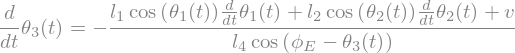

In [24]:
# Heel strike 2, dy/st
omega_3HS = solve(const_HS_u_E, omega_3)[0]
Eq(omega_3, omega_3HS)

In [14]:
# Foot Planted 1: y
y_FP = solve(const_FP_y_E, y)[0]
Eq(y, y_FP)

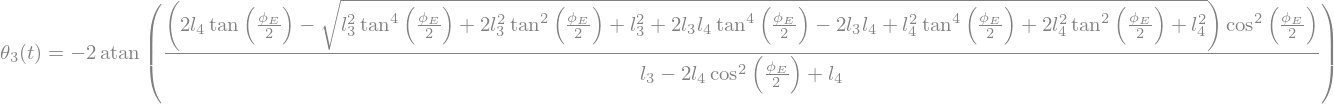

In [15]:
# Foot planted 2: theta_3
theta_3FP = simplify(solve(const_FP_y_D.subs(y, y_FP), theta_3)[0])
# theta_1FP = theta_1FP.
Eq(theta_3, theta_3FP)

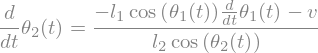

In [16]:
# Foot planted 3: omega_2
omega_2FP = solve(const_FP_u_E.subs(y, y_FP).subs(theta_3, theta_3FP), omega_2)[0]
Eq(omega_2, omega_2FP)

In [17]:
# Toe lift-off 1: y
y_TLO = solve(const_TLO_y_D, y)[0]
Eq(y, y_TLO)

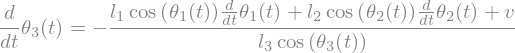

In [18]:
# Toe lift-off 2: omega_3
omega_3TLO = solve(const_TLO_u_D.subs(y, y_TLO), omega_3)[0]
Eq(omega_3, omega_3TLO)

Equations of Motion (no constraints or efforts)

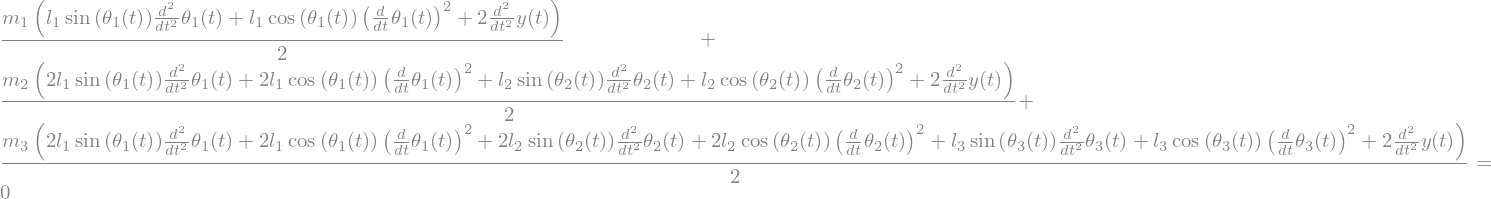

In [19]:
# y
EOM_y = simplify(diff(diff(T, v_A), t) - diff(T, y) + diff(D, v_A) + diff(V, y))
Eq(EOM_y, 0)

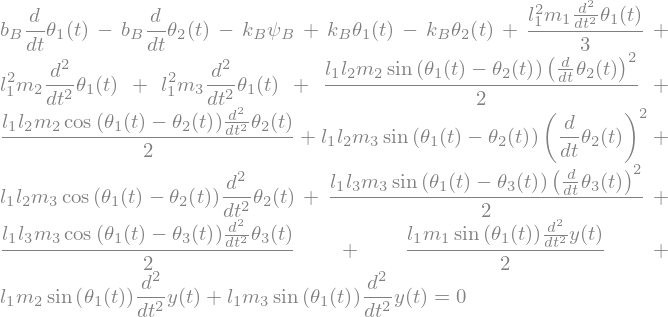

In [20]:
# theta_1
EOM_1 = simplify(diff(diff(T, omega_1), t) - diff(T, theta_1) + diff(D, omega_1) + diff(V, theta_1))
Eq(EOM_1, 0)

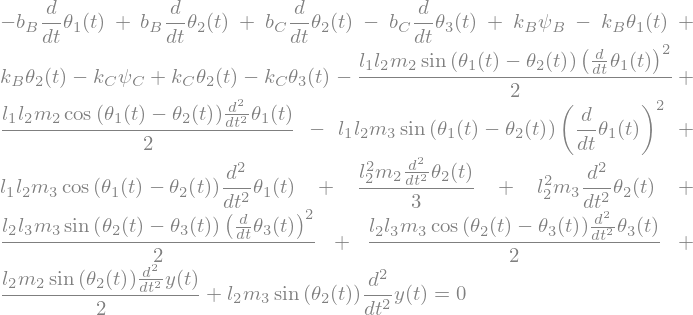

In [21]:
# theta_2
EOM_2 = simplify(diff(diff(T, omega_2), t) - diff(T, theta_2) + diff(D, omega_2) + diff(V, theta_2))
Eq(EOM_2, 0)

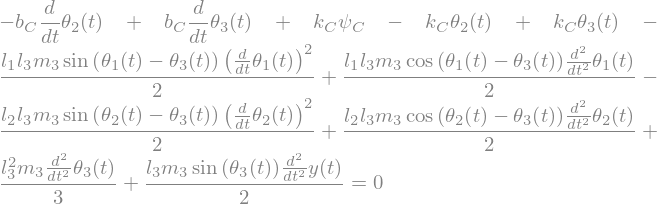

In [22]:
# theta_3
EOM_3 = simplify(diff(diff(T, omega_3), t) - diff(T, theta_3) + diff(D, omega_3) + diff(V, theta_3))
Eq(EOM_3, 0)